<h3>Neural network, experimentation tool, version 2</h3>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# just copy/paste -the needed activation functions, 
# we're going to need these again

# activation functions
# ReLu is very simple, it filters out all negative numbers
# this is a powerful activation function in reality
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0
    
# we also need a derived version of ReLu later
# otherwise the same than original, but instead of original value
# return 1 instead
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [15]:
df = pd.read_csv("medical_insurance.csv")
df = df[["age", "bmi", "charges"]]
df

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
2767,47,45.320,8569.86180
2768,21,34.600,2020.17700
2769,19,26.030,16450.89470
2770,23,18.715,21595.38229


<b>The neural network training code</b>

In [16]:
# we'll start building our neural network training app here
# initialize weights and biases
# in Keras etc. these are usually randomized in the beginning
w1 = 1
w2 = 0.5
w3 = 1
w4 = -0.5
w5 = 1
w6 = 1
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# we'll save these for future
# se we can compare results to the final weights
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3
 
# learning rate and epochs
LR = 0.005
epochs = 300

# DataFrame data values as list
data = list(df.values)

# use min/max-scaling to make the values in the range 0 - 1
data = (data - np.min(data)) /(np.max(data) - np.min(data))

# let's initialize a list for loss points
loss_points = []

# START THE TRAINING PROCESS
for epoch in range(epochs):

    # let's also monitor epoch-wise losses
    epoch_losses = []

    for row in data:
        # for example with first row
        # [1, 0, 2] => assign input1 = 1, input2 = 0, true_value = 2
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        # FORWARD PASS

        # NODE 1 OUTPUT
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)

        # NODE 2 OUTPUT
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the the previous weights
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        # probably used later, we might want to have error metrics (MSE)
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2

        # add current training data row loss to epoch losses
        epoch_losses.append(loss)

        # BACKPROPAGATION - LAST LAYER FIRST
        # solve w5 and update the new value
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        # solve w6 and update the new value
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        # solve bias3 and update the new value
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # BACKPROPAGATION - THE FIRST LAYER
        # FROM THIS POINT FORWARD WE HAVE TO USE THE MORE COMPLEX VERSION
        # OF UPDATING THE VALUES -> CHAIN RULE

        # see the materials and the math experiment notebook for more details
        # start with weight 1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        # weight 2
        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        # weight 3
        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        # weight 4
        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # bias 1
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        # bias 2
        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # ALL DONE! FINALLY UPDATE THE EXISTING WEIGHTS!
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    # calculate average epoch-wise loss and add it the loss_points
    average_loss = sum(epoch_losses) / len(epoch_losses)

    # place the average loss of this epoch into the overall loss list
    loss_points.append(average_loss)
    print(f"Epoch: {epoch +1}, loss {loss}")

Epoch: 1, loss 0.002898427381287707
Epoch: 2, loss 0.0028987276291954126
Epoch: 3, loss 0.0028990274027002965
Epoch: 4, loss 0.002899326673383366
Epoch: 5, loss 0.002899625413951005
Epoch: 6, loss 0.002899923598184759
Epoch: 7, loss 0.002900221200893442
Epoch: 8, loss 0.002900518197867183
Epoch: 9, loss 0.0029008145658334307
Epoch: 10, loss 0.002901110282414946
Epoch: 11, loss 0.002901405326089596
Epoch: 12, loss 0.0029016996761518994
Epoch: 13, loss 0.0029019933126763655
Epoch: 14, loss 0.002902286216482406
Epoch: 15, loss 0.0029025783691009506
Epoch: 16, loss 0.002902869752742521
Epoch: 17, loss 0.0029031603502667966
Epoch: 18, loss 0.002903450145153666
Epoch: 19, loss 0.002903739121475606
Epoch: 20, loss 0.0029040272638714408
Epoch: 21, loss 0.002904314557521251
Epoch: 22, loss 0.002904600988122704
Epoch: 23, loss 0.0029048865418683407
Epoch: 24, loss 0.0029051712054241484
Epoch: 25, loss 0.00290545496590918
Epoch: 26, loss 0.0029057378108761347
Epoch: 27, loss 0.0029060197282930605

In [17]:
print("ORIGINAL WEIGHTS AND BIASES")
print(f"w1: {original_w1}")
print(f"w2: {original_w2}")
print(f"w3: {original_w3}")
print(f"w4: {original_w4}")
print(f"w5: {original_w5}")
print(f"w6: {original_w6}")
print(f"b1: {original_b1}")
print(f"b2: {original_b2}")
print(f"b3: {original_b3}")

print("\n\n######################################")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")
print(f"w4: {w4}")
print(f"w5: {w5}")
print(f"w6: {w6}")
print(f"b1: {bias1}")
print(f"b2: {bias2}")
print(f"b3: {bias3}")



ORIGINAL WEIGHTS AND BIASES
w1: 1
w2: 0.5
w3: 1
w4: -0.5
w5: 1
w6: 1
b1: 0.5
b2: 0
b3: 0.5


######################################
NEW WEIGHTS AND BIASES
w1: 1.0514572358400067
w2: 0.49999840106287474
w3: 1.014988333438993
w4: -0.5000006329126121
w5: 0.2658051321730554
w6: 0.9999995169877434
b1: 0.04838695218534944
b2: -0.00598235832164403
b3: 0.19483435509371008


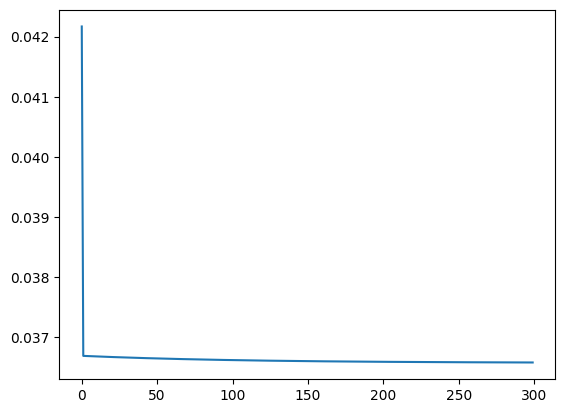

In [18]:
plt.plot(loss_points)
plt.show()

In [19]:
# prediction function, just doing the forward pass
# again (but only that)
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # FORWARD PASS

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the the previous weights
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [20]:
# get the actual values
df.iloc[199]

age           64.0000
bmi           39.3300
charges    14901.5167
Name: 199, dtype: float64

In [21]:
# get the normalized values
data[199]

array([0.00075352, 0.00036656, 0.23348256])

In [22]:
# we'll try using some values from the original training data
result = predict(0.8, 0.8)

In [23]:
# convert scaled value back to actual USD
df['charges'].max() * result

41266.6937350033

In [24]:
df.describe()

,age,bmi,charges
count,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,13261.369959
std,14.081459,6.129449,12151.768945
min,18.000000,15.960000,1121.873900
25%,26.000000,26.220000,4687.797000
50%,39.000000,30.447500,9333.014350
75%,51.000000,34.770000,16577.779500
max,64.000000,53.130000,63770.428010
